<a href="https://colab.research.google.com/github/JustynaGoc/machine-learning-bootcamp/blob/main/2_Braki_danych.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import pandas as pd
import numpy as np
import sklearn

In [81]:
data = {
    "size" :  ["XL", "L", "M",  np.nan ,"M", "M"],
    "color":  ["red", "green", "blue", "green", "red", "green"],
    "gender": ["female", "male", np.nan, "female", "female","male"],
    "price":  [199.0, 89.0, np.nan, 129.0,  79.0, 89.0],
    "weight": [500, 450, 300, np.nan,  410, np.nan],
    "bought": ["yes", "no", "yes", "no", "yes","no"]
}
df_raw = pd.DataFrame(data)
df_raw

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [82]:
df= df_raw.copy()
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2020-01-01 09:00:00 to 2020-01-01 18:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   8 non-null      float64
dtypes: float64(1)
memory usage: 160.0 bytes


In [84]:
df.isnull()

,size,color,gender,price,weight,bought
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,True,False,False
3,True,False,False,False,True,False
4,False,False,False,False,False,False
5,False,False,False,False,True,False


In [85]:
df.isnull().count()

,0
size,6
color,6
gender,6
price,6
weight,6
bought,6


In [86]:
df.isnull().sum()

,0
size,1
color,0
gender,1
price,1
weight,2
bought,0


In [121]:
df.isnull().sum().sum()

np.int64(2)

In [88]:
df.isnull().sum()/len(df)

,0
size,0.166667
color,0.000000
gender,0.166667
price,0.166667
weight,0.333333
bought,0.000000


Uzupełnianie brakow - SimpleImputer

In [122]:
from sklearn.impute import SimpleImputer

In [90]:

# strategy: "mean", "median", "most_frequent", "constant"
imputer = SimpleImputer(missing_values=np.nan, strategy = "mean")
imputer.fit(df[["weight"]])

SimpleImputer()

In [91]:
df[["weight"]]

,weight
0,500.0
1,450.0
2,300.0
3,NaN
4,410.0
5,NaN


In [92]:
imputer.statistics_

array([415.])

In [93]:
imputer.transform(df[["weight"]])

array([[500.],
       [450.],
       [300.],
       [415.],
       [410.],
       [415.]])

In [94]:
df[["weight"]] =imputer.transform(df[["weight"]])
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


In [95]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value = 99.0)
df[["price"]] =imputer.fit_transform(df[["price"]] )
df[["price"]]

,price
0,199.0
1,89.0
2,99.0
3,129.0
4,79.0
5,89.0


In [96]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value = "L")
imputer.fit_transform(df[["size"]] )


array([['XL'],
       ['L'],
       ['M'],
       ['L'],
       ['M'],
       ['M']], dtype=object)

In [97]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imputer.fit_transform(df[["size"]] )

array([['XL'],
       ['L'],
       ['M'],
       ['M'],
       ['M'],
       ['M']], dtype=object)

In [98]:
df = df_raw.copy()
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [99]:
df.isnull().sum()

,0
size,1
color,0
gender,1
price,1
weight,2
bought,0


In [100]:
pd.isnull(df["weight"])

,weight
0,False
1,False
2,False
3,True
4,False
5,True


In [101]:
df[pd.isnull(df["weight"])]

,size,color,gender,price,weight,bought
3,NaN,green,female,129.0,NaN,no
5,M,green,male,89.0,NaN,no


In [102]:
df[~pd.isnull(df["weight"])]

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
4,M,red,female,79.0,410.0,yes


In [103]:
pd.notnull(df["weight"])

,weight
0,True
1,True
2,True
3,False
4,True
5,False


In [104]:
df[pd.notnull(df["weight"])]

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
4,M,red,female,79.0,410.0,yes


In [105]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [106]:
df.fillna(value= "brak")


,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,brak,brak,300.0,yes
3,brak,green,female,129.0,brak,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,brak,no


In [107]:
df.fillna(value = 0.0)

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,0.0,0.0,300.0,yes
3,0.0,green,female,129.0,0.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,0.0,no


In [108]:
df["size"].fillna(value = "L", inplace = True)
df

/tmp/ipython-input-601472815.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,L,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [109]:
df.dropna()

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
4,M,red,female,79.0,410.0,yes


In [110]:
df = df.dropna()

In [111]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
4,M,red,female,79.0,410.0,yes


Braki danych szeregi czasowe

In [112]:
data = {
    "price": [108,109,110,110,109, np.nan, np.nan, 112,111,111]
}


In [113]:
date_range = pd.date_range(start = '01-01-2020 09:00', end = '01-01-2020 18:00', periods = 10)
df = pd.DataFrame(data, index = date_range)
df

,price
2020-01-01 09:00:00,108.0
2020-01-01 10:00:00,109.0
2020-01-01 11:00:00,110.0
2020-01-01 12:00:00,110.0
2020-01-01 13:00:00,109.0
2020-01-01 14:00:00,NaN
2020-01-01 15:00:00,NaN
2020-01-01 16:00:00,112.0
2020-01-01 17:00:00,111.0
2020-01-01 18:00:00,111.0


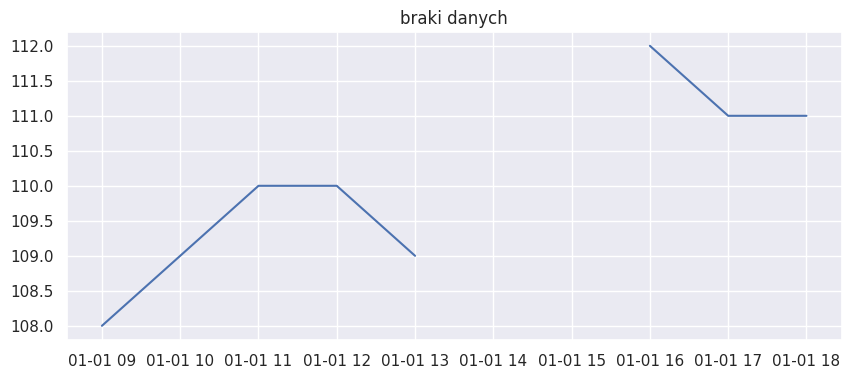

In [114]:
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import seaborn as sns
register_matplotlib_converters()
sns.set()
plt.figure(figsize = (10,4))
plt.title("braki danych")
_ = plt.plot(df.price)

In [115]:
import plotly.express as px
df_plotly = df.reset_index()
df_plotly

,index,price
0,2020-01-01 09:00:00,108.0
1,2020-01-01 10:00:00,109.0
2,2020-01-01 11:00:00,110.0
3,2020-01-01 12:00:00,110.0
4,2020-01-01 13:00:00,109.0
5,2020-01-01 14:00:00,NaN
6,2020-01-01 15:00:00,NaN
7,2020-01-01 16:00:00,112.0
8,2020-01-01 17:00:00,111.0
9,2020-01-01 18:00:00,111.0


In [116]:
px.line(df_plotly, "index", "price", width=600, height=400, title= "Szeregi czasowe - oryginał" )

Usuwanie braków - szeregi czasowe

uzupenienie  0 ---- dla potrzeb  kursu - bez inplace = True

In [117]:
df_plotly.fillna(0)
px.line(df_plotly.fillna(0), "index", "price", width=600, height=400, title= "Szeregi czasowe - uzupelnienie brakow  wartoscia 0" )

In [118]:
px.line(df_plotly.fillna(df_plotly["price"].mean()), "index", "price", width=600, height=400, title= "Szeregi czasowe - uzupełnienie brakow średnia" )

In [123]:
px.line(df_plotly, "index", df["price"].interpolate(), width=600, height=400, title= "Szeregi czasowe -  uzupelnienie interpolacja " )

In [124]:
px.line(df_plotly, "index", df["price"].fillna(method = 'ffill'), width=600, height=400, title= "Szeregi czasowe -  forward fdill" )

/tmp/ipython-input-220762213.py:1: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [125]:
px.line(df_plotly, "index", df["price"].ffill(), width=600, height=400, title= "Szeregi czasowe -  forward fdill" )

In [127]:
px.line(df_plotly, "index", df["price"].bfill(), width=600, height=400, title= "Szeregi czasowe -  back fdill" )